In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/home/roger/Desktop/283.jpg")
#image = image[:210,:]

In [18]:
def findGreatesContour(contours, threshold=500):
    largest_area = 0
    largest_contour_index = -1
    i = 0
    total_contours = len(contours)
    while (i < total_contours ):
        area = cv2.contourArea(contours[i])
        if(area > largest_area and area > threshold):
            largest_area = area
            largest_contour_index = i
        i+=1
            
    return largest_area, largest_contour_index

In [20]:
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
green_low = np.array([0, 58, 30] )
green_high = np.array([33, 150, 255])
curr_mask = cv2.inRange(hsv_img, green_low, green_high)
mask = cv2.bitwise_and(image, image, mask = curr_mask)
## contouring
RGB_again = cv2.cvtColor(mask, cv2.COLOR_HSV2RGB)
gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY)
ret, threshold = cv2.threshold(gray, 75, 105, 0)
contours, hierarchy =  cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

max_contours = []
for i in range(2):
    largest_area, largest_contour_index = findGreatesContour(contours)
    print largest_area
    if largest_area:
        max_contours.append(contours[largest_contour_index])
        del contours[largest_contour_index]
print len(max_contours)
#cv2.drawContours(image, max_contours, -1, (0, 0, 255), 3)

1102.0
995.0
2


In [21]:
min_x, max_x, min_y, max_y = 256, 0, 256, 0
for contour in max_contours:
    for points in contour:
        for x, y in points:
            if x < min_x: min_x = x
            if x > max_x: max_x = x
            if y < min_y: min_y = y
            if y > max_y: max_y = y

[[2, 22, 137, 234]]


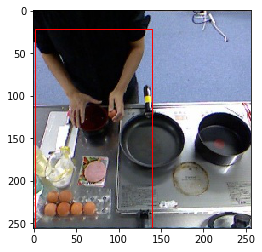

In [135]:
img = "/home/roger/Desktop/283.jpg"
min_x, max_x, min_y, max_y = 12, 129, 32, 246
x, y = min_x-10, min_y-10
w, h = max_x-min_x+20, max_y-min_y+20
playBox(img, [[x, y, w, h]])

[[78, 22, 61, 118]]


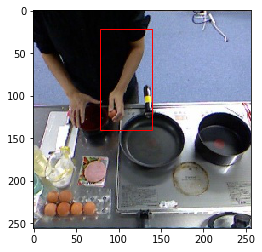

In [16]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


def playBox(img, bounding_boxes):
    im = np.array(Image.open(img), dtype=np.uint8)
    fig, ax = plt.subplots(1)
    ax.imshow(im)
    print bounding_boxes
    for x, y, w, h in bounding_boxes:
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.show()
    
img = "/home/roger/Desktop/283.jpg"
x, y = 88-10, 32-10
w, h = 129-88+20, 130-32+20
playBox(img, [[x, y, w, h]])

In [23]:
len(contours)

69

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/home/roger/Desktop/3346.jpg")
image = image[:210,:]

def viewImage(image):
    cv2.namedWindow('Display', cv2.WINDOW_NORMAL)
    cv2.imshow('Display', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def findHandsContour(contours, threshold=600):
    g = []
    largest_area = 0
    largest_contour_index = -1
    i = 0
    total_contours = len(contours)
    while (i < total_contours ):
        area = cv2.contourArea(contours[i])
        if(area > threshold):
            largest_area = area
            largest_contour_index = i
            g.append(contours[i])
        i+=1
            
    return g

hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
green_low = np.array([0, 58, 30] )
green_high = np.array([33, 150, 255])
curr_mask = cv2.inRange(hsv_img, green_low, green_high)
mask = cv2.bitwise_and(image, image, mask = curr_mask)
## contouring
RGB_again = cv2.cvtColor(mask, cv2.COLOR_HSV2RGB)
gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY)
ret, threshold = cv2.threshold(gray, 75, 105, 0)
contours, hierarchy =  cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

g = findHandsContour(contours)
cv2.drawContours(image, g, -1, (0, 0, 255), 3)
viewImage(image)

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

from IPython.display import display, HTML
import cv2
import base64

def imshow(name, imageArray):
     _, png = cv2.imencode('.png', imageArray)
     encoded = base64.b64encode(png)
     return HTML(data='''<img alt="{0}" src="data:image/png;base64, {1}"/>'''.format(name, encoded.decode('ascii')))


def viewImage(image):
    cv2.namedWindow('Display', cv2.WINDOW_NORMAL)
    cv2.imshow('Display', image)
    cv2.waitKey(14)
    #cv2.destroyAllWindows()
    
    
image = cv2.imread("/home/roger/Desktop/3346.jpg")
image = image[:10,:]

hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
green_low = np.array([0,0,100] )
green_high = np.array([255,255,255])
curr_mask = cv2.inRange(hsv_img, green_low, green_high)
mask = cv2.bitwise_and(image, image, mask = curr_mask)
mask = 255 - mask
#blue=cv2.inRange(hsv_img,green_low,green_high)
#plt.imshow(cv2.cvtColor(blue, cv2.BGR2RGB))
#plt.show()
imshow('baboon', mask)

In [99]:
def findHandsContour(contours, threshold=10):
    g = []
    largest_area = 0
    largest_contour_index = -1
    i = 0
    total_contours = len(contours)
    while (i < total_contours ):
        area = cv2.contourArea(contours[i])
        if(area > threshold):
            largest_area = area
            largest_contour_index = i
            g.append(contours[i])
        i+=1
            
    return g

RGB_again = cv2.cvtColor(mask, cv2.COLOR_HSV2RGB)
gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY)
ret, threshold = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy =  cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

g = findHandsContour(contours)
cv2.drawContours(image, g[1], -1, (0, 0, 255), 3)
imshow('baboson', threshold)

In [126]:
mask = np.where(mask > 200, 255, 0)

In [121]:
imshow('baboson', mask)

In [128]:
mask = np.uint8(mask)
RGB_again = cv2.cvtColor(mask, cv2.COLOR_HSV2RGB)
gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY)
contours, hierarchy =  cv2.findContours(gray,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(mask, contours, -1, (0, 0, 255), 3)
imshow('baboson', mask)

[[115, 0, 139, 110]]


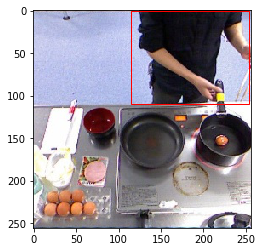

In [134]:
def findGreatesContour(contours):
    largest_area = 0
    largest_contour_index = -1
    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if(area > largest_area):
            largest_area = area
            largest_contour_index = i
            
    return largest_area, largest_contour_index

def findGreatesContour2(contours):
    largest_area = 0
    largest_contour_index = -1
    i = 0
    total_contours = len(contours)
    while (i < total_contours ):
        area = cv2.contourArea(contours[i])
        if(area > largest_area):
            largest_area = area
            largest_contour_index = i
        i+=1
            
    return largest_area, largest_contour_index

largest_area, largest_contour_index = findGreatesContour(contours)
contour = contours[largest_contour_index]

min_x, max_x = 256, 0
for points in contour:
    for x, y in points:
        if x < min_x: min_x = x
        if x > max_x: max_x = x
min_y = 0
max_y = 120

%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

IMAGE="/home/roger/Desktop/3346.jpg"

def playBox(img, bounding_boxes):
    im = np.array(Image.open(img), dtype=np.uint8)
    fig, ax = plt.subplots(1)
    ax.imshow(im)
    print bounding_boxes
    for x, y, w, h in bounding_boxes:
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.show()
    
x, y = min_x-10, 0
w, h = max_x-min_x+20, 110
playBox(IMAGE, [[x, y, w, h]])